<a href="https://colab.research.google.com/github/Abhijithpilakka/mammookka_lalettan/blob/main/lalettan_mammookka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras

In [36]:
img = image.load_img('/content/drive/MyDrive/dataset/test/3 (21).jpg')

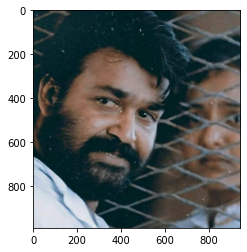

In [37]:
plt.imshow(img)

In [38]:
cv2.imread('/content/drive/MyDrive/dataset/test/3 (21).jpg').shape

(989, 942, 3)

In [39]:
train = ImageDataGenerator(rescale=1/233)
validation = ImageDataGenerator(rescale=1/233)

In [40]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/dataset/train/',
                                          target_size= (800,800),
                                          batch_size=3,
                                          class_mode= 'binary')

validation_dataset = train.flow_from_directory('/content/drive/MyDrive/dataset/validation/',
                                          target_size= (800,800),
                                          batch_size=3,
                                          class_mode= 'binary')

Found 40 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [41]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation= 'relu',input_shape = (800,800,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(96,(3,3),activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                  
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])

                                    

In [42]:
model.compile(loss='binary_crossentropy',
              optimizer = keras.optimizers.RMSprop(lr=0.001),
              metrics =['accuracy'])

In [43]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 30,
                      validation_data = validation_dataset)

Epoch 1/30
3/3 [==============================] - 2s 475ms/step - loss: 26.7217 - accuracy: 0.4861 - val_loss: 1.6367 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 1s 381ms/step - loss: 1.5349 - accuracy: 0.4306 - val_loss: 1.4980 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 1s 358ms/step - loss: 1.5301 - accuracy: 0.5833 - val_loss: 0.7328 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 1s 383ms/step - loss: 0.6593 - accuracy: 0.6667 - val_loss: 0.7186 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 1s 385ms/step - loss: 0.7469 - accuracy: 0.4444 - val_loss: 0.6849 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 1s 388ms/step - loss: 0.7018 - accuracy: 0.4306 - val_loss: 0.6873 - val_accuracy: 0.5556
Epoch 7/30
3/3 [==============================] - 1s 394ms/step - loss: 0.7199 - accuracy: 0.3333 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 8/30
3/3 [===

In [44]:
validation_dataset.class_indices

{'LALETTAN': 0, 'MAMMOOKKA': 1}

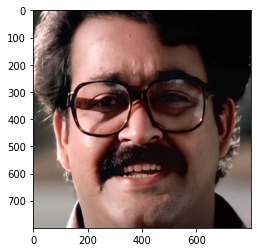

lalettan


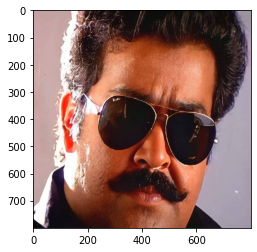

lalettan


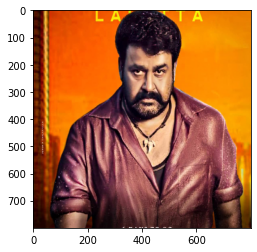

lalettan


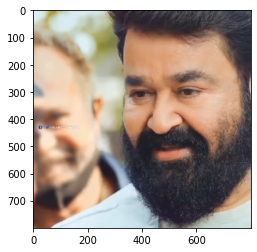

mammookka


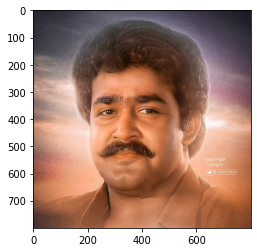

lalettan


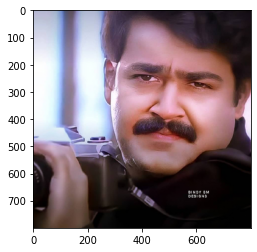

mammookka


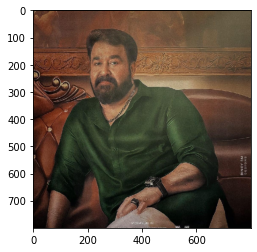

mammookka


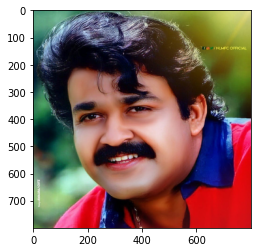

lalettan


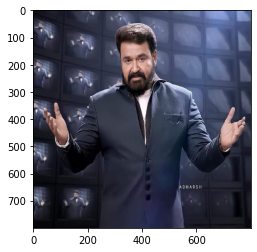

lalettan


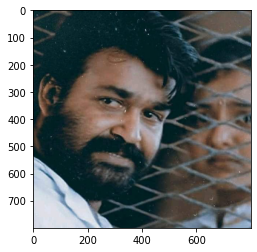

lalettan


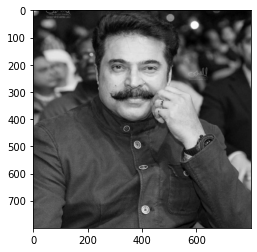

lalettan


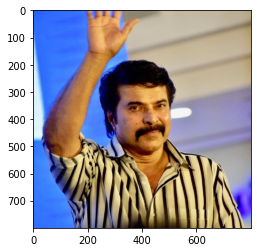

lalettan


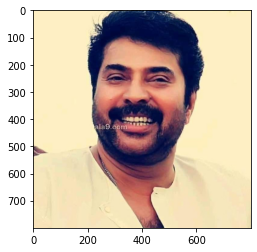

mammookka


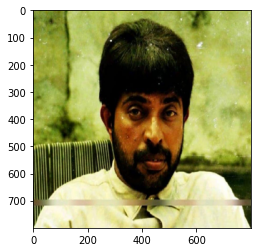

mammookka


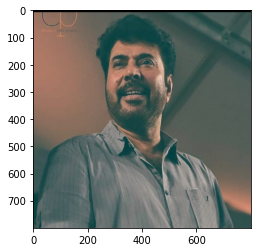

mammookka


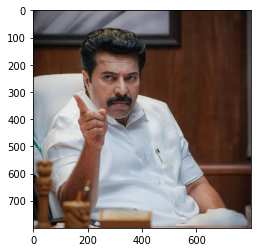

mammookka


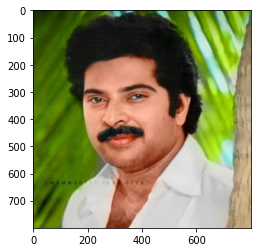

lalettan


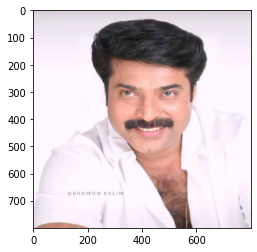

mammookka


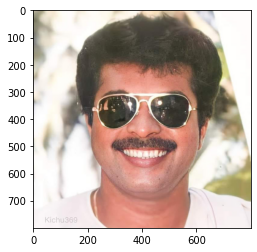

lalettan


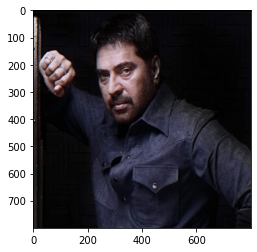

lalettan


In [48]:
dir_path = '/content/drive/MyDrive/dataset/test'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i,target_size=(800,800))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X , axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 0:
    print('lalettan')

  else:
    print('mammookka')